In [1]:
import cdflib

xry = cdflib.cdf_to_xarray('../akebono_data/vlf/elf/ak_h1_elf_19900130_v03.cdf')
xry

ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable E_axis, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Mode, but the dimensions do not match.


<xarray.Dataset>
Dimensions:           (Epoch_wav_narrow: 6547760, record0: 156356, Epoch: 172800)
Coordinates:
  * Epoch             (Epoch) float64 -1e+30 6.28e+13 ... 6.28e+13 6.28e+13
  * Epoch_wav_narrow  (Epoch_wav_narrow) float64 6.28e+13 6.28e+13 ... 6.28e+13
Dimensions without coordinates: record0
Data variables:
    dE_wav_narrow     (Epoch_wav_narrow) float32 1.864 3.106 ... 1.864 1.864
    dBx_wav_narrow    (Epoch_wav_narrow) float32 -0.9637 0.3616 ... -0.3423
    dBy_wav_narrow    (Epoch_wav_narrow) float32 0.7798 -1.466 ... -0.5929
    dBz_wav_narrow    (Epoch_wav_narrow) float32 0.5157 -1.177 ... 1.089 0.8472
    E_axis            (record0) <U1 ' ' 'x' 'x' 'x' 'x' ... 'x' 'x' 'x' 'x' 'x'
    Mode              (record0) <U1 ' ' 'n' 'n' 'n' 'n' ... 'n' 'n' 'n' 'n' 'n'
    PostGap           (Epoch) uint32 4294967294 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1
Attributes: (12/24)
    Acknowledgement:             AKEBONO VLF-ELF data were provided by Akebon...
    ADID_ref:                    NSSD0241 
    Data_type:                   H1 > High Resolution data
    Data_version:                3
    Descriptor:                  ELF > ELF Receiver
    Discipline:                  Space Physics > Magnetospheric Science
    ...                          ...
    source_name:                 Akebono > Akebono satellite
    TEXT:                        Kimura, I., K. Hashimoto, I. Nagano, T. Okad...
    Time_resolution:             160Hz
    TITLE:                       Akebono ELF High resolution data
    Start_time:                  1990_01/30_0:0:0:0
    End_time:                    1990_01/30_23:59:59:999

In [15]:
Epoch = xry['Epoch_wav_narrow'][0:100].values
bx = xry['dBx_wav_narrow'][0:100].values
by = xry['dBy_wav_narrow'][0:100].values
bz = xry['dBz_wav_narrow'][0:100].values

In [16]:
from preprocess_mgf_epoch import convert_epoch

Epoch = convert_epoch(Epoch)

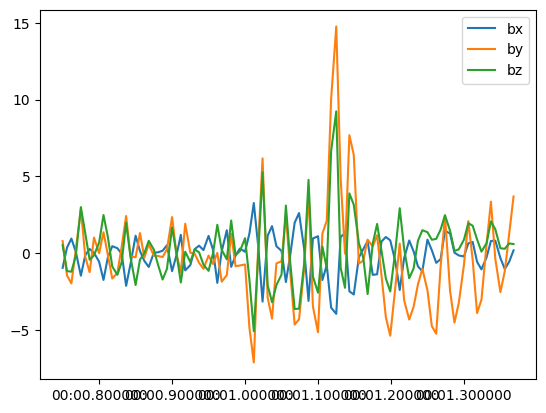

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Epoch, bx, label='bx')
ax.plot(Epoch, by, label='by')
ax.plot(Epoch, bz, label='bz')
ax.legend()
plt.show()

In [1]:
from preprocess_elf import store_elf
cdf_name = '../akebono_data/vlf/elf/waveform/ak_h1_elf_19900211_v03.cdf'
store_elf(cdf_name)

ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable E_axis, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Mode, but the dimensions do not match.


In [2]:
import pytplot
pytplot.tplot_names()

0 : E_waveform
1 : Bx_waveform
2 : By_waveform
3 : Bz_waveform


['E_waveform', 'Bx_waveform', 'By_waveform', 'Bz_waveform']

In [6]:
pytplot.options(['Bx_waveform', 'By_waveform', 'Bz_waveform'], opt_dict={'yrange': [-1000, 1000]})

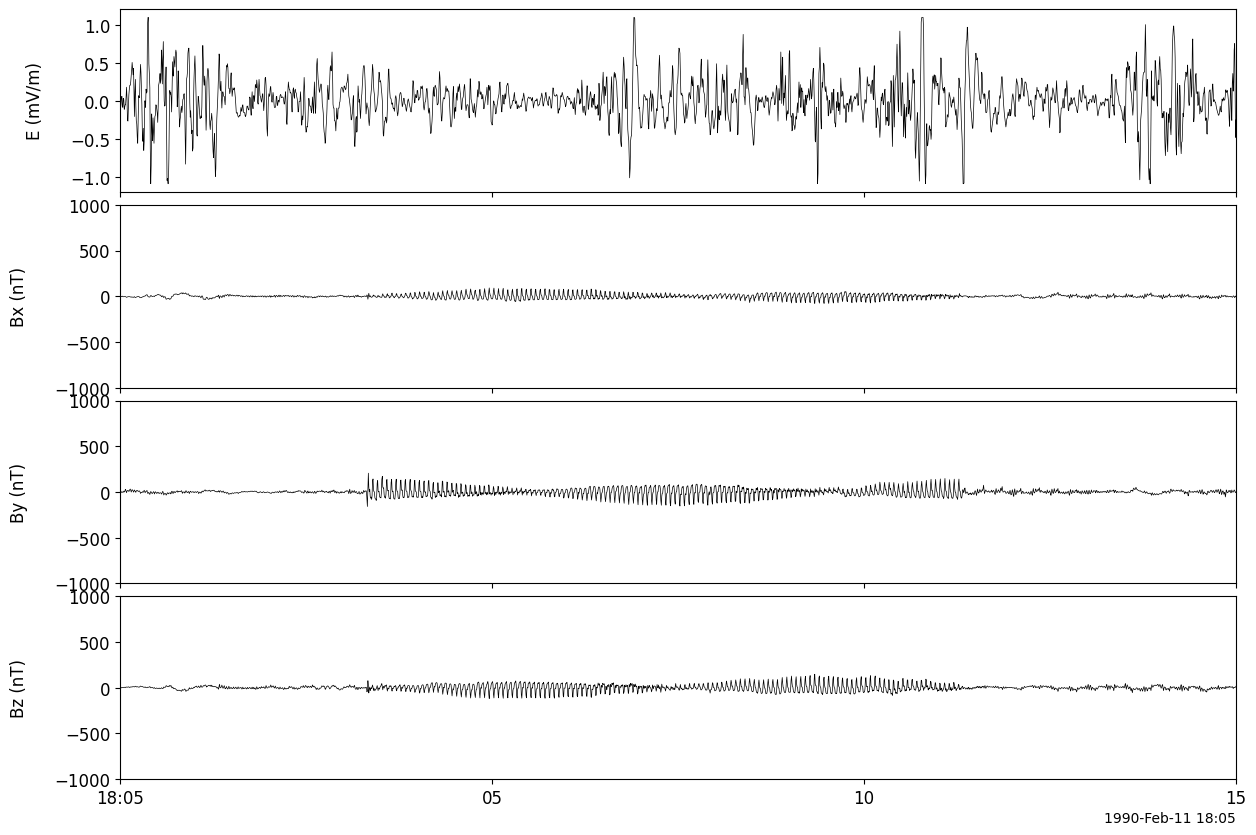

In [10]:
pytplot.tlimit(['1990-2-11 18:05:00', '1990-2-11 18:5:15'])
pytplot.tplot(['E_waveform', 'Bx_waveform', 'By_waveform', 'Bz_waveform'], ysize=10)

# elf spectrum

In [12]:
import cdflib 
ds = cdflib.cdf_to_xarray('../akebono_data/vlf/elf/spectrum/ak_h1_elf_19900211_v01.cdf')
ds

ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable E, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable B, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable By_narrow, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Bz_narrow, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable E_axis, but the dimensions do not match.
ISTP Compliance Warning: Epoch is listed as the DEPEND_0 for variable Mode, but the dimensions do not match.


<xarray.Dataset>
Dimensions:    (record0: 10524, dim0: 128, dim1: 64, record1: 10525,
                Epoch: 10800)
Coordinates:
  * Epoch      (Epoch) float64 6.28e+13 6.28e+13 6.28e+13 ... 6.28e+13 6.28e+13
Dimensions without coordinates: record0, dim0, dim1, record1
Data variables:
    E          (record0, dim0) uint8 254 254 254 254 254 254 254 ... 0 0 0 0 0 0
    B          (record0, dim0) uint8 254 254 254 254 254 254 254 ... 0 0 0 0 0 0
    By_narrow  (record0, dim1) uint8 254 254 254 254 254 ... 113 111 111 113 113
    Bz_narrow  (record0, dim1) uint8 254 254 254 254 254 ... 99 101 98 99 101
    E_axis     (record1) <U1 ' ' ' ' ' ' ' ' ' ' ' ' ... 'x' 'x' 'x' 'x' 'x' 'E'
    Mode       (record0) <U1 ' ' ' ' ' ' ' ' ' ' ' ' ... 'n' 'n' 'n' 'n' 'n' 'n'
    PostGap    (Epoch) uint32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    Frequency  (dim0) float32 1.0 2.25 3.5 4.75 6.0 ... 156.0 157.2 158.5 159.8
Attributes: (12/24)
    Acknowledgement:             AKEBONO VLF-ELF data were provided by Akebon...
    ADID_ref:                    NSSD0241 
    Data_type:                   H1 > High Resolution data
    Data_version:                1
    Descriptor:                  ELF > ELF Receiver
    Discipline:                  Space Physics > Magnetospheric Science
    ...                          ...
    source_name:                 Akebono > Akebono satellite
    TEXT:                        Kimura, I., K. Hashimoto, I. Nagano, T. Okad...
    Time_resolution:             s
    TITLE:                       Akebono ELF High resolution data
    Start_time:                  1990_02/11_0:0:0:0
    End_time:                    1990_02/11_23:59:59:999

In [13]:
from preprocess_mgf_epoch import convert_epoch
epoch = ds['Epoch'].values
epoch = convert_epoch(epoch)
epoch

array(['1990-02-11T00:00:04.000000000', '1990-02-11T00:00:12.000000000',
       '1990-02-11T00:00:20.000000000', ...,
       '1990-02-11T23:59:40.000000000', '1990-02-11T23:59:48.000000000',
       '1990-02-11T23:59:56.000000000'], dtype='datetime64[ns]')

In [20]:
E = ds['E'].values
# 2次元配列Eの形状を確認して、末尾にnanを追加して10800*64の配列にする
import numpy as np
print(E.shape)
E = np.append(E, np.full((10800-E.shape[0], E.shape[1]), np.nan), axis=0)

(10524, 128)


In [21]:
E.shape

(10800, 128)

In [22]:
pytplot.store_data('E_spectrum', data={'x': epoch, 'y': E, 'v':ds['Frequency'].values})

True

In [ ]:
pytplot.options('E_spectrum', opt_dict={'ytitle': 'E',
                                        'ysubtitle': 'Frequency (Hz)',
                                        'ztitle': 'Intensity (dB)',
                                        'spec': True})